# **Importing libraries and packages**

In [14]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")
sns.set_style("darkgrid")

# **Load/ Read the Audi dataset from the csv file**

In [4]:
from google .colab import files
uploaded=files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['audi.csv']))
#df= pd.read_csv("audi.csv")
display(df.head())
print(df.info())
display(df.describe())

Saving audi.csv to audi (1).csv


,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,49.6,1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   mpg           10668 non-null  float64
 7   engineSize    10668 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 666.9+ KB
None


,year,price,mileage,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,188.300000,6.300000


# **Features:**
The Feature variables of the given dataset of Audi cars are:

*   **Model:** categories of the Audi car
*   **Year:** the manufacturing year of the  car was made
*   **Transmission:** it converts the engine’s combustion power to momentum which drives the wheels
*   **Mileage:** the number of miles the vehicle has driven
*   **FuelType:** energy source of the vehicle
*   **MPG:** miles per gallon the vehicle can travel
*   **EngineSize:** Engine size is the volume of fuel and air that can be pushed through a car's cylinders
## **Target Variable:**

*   **Price:** selling price of the car




**Find out the total unique values in Model Column**

In [ ]:
df['model']. unique()

array([' A1', ' A6', ' A4', ' A3', ' Q3', ' Q5', ' A5', ' S4', ' Q2',
       ' A7', ' TT', ' Q7', ' RS6', ' RS3', ' A8', ' Q8', ' RS4', ' RS5',
       ' R8', ' SQ5', ' S8', ' SQ7', ' S3', ' S5', ' A2', ' RS7'],
      dtype=object)

# **Exploratory Data Analysis(EDA)**

**EDA With group by for model**

In [5]:
df_agg = df.groupby('model')['price'].agg(['count', 'mean', 'sum'])

display(df_agg)

,count,mean,sum
model,,,
A1,1347,14327.750557,19299480
A2,1,2490.000000,2490
A3,1929,17408.522032,33581039
A4,1381,20255.450398,27972777
A5,882,23577.114512,20795015
A6,748,22695.385027,16976148
A7,122,28865.516393,3521593
A8,118,34981.847458,4127858
Q2,822,22516.975669,18508954


**Data preprocessing for visualization**

In [6]:
# sorting the dataframe of the column name 'count'
df_agg = df_agg.sort_values(by='count', ascending=False)

# createing a new column percentage of the cars in each model
df_agg['percent_of_cars'] = (df_agg['count']/df_agg['count'].sum())*100

# converted the 'sum' column into millions
df_agg['sum'] = df_agg['sum']/1000000

# keep up to two decimal points
df_agg = df_agg.round(2)

# removing the 'count' column
df_agg = df_agg.drop('count', axis=1)

display(df_agg.head())

,mean,sum,percent_of_cars
model,,,
A3,17408.52,33.58,18.08
Q3,22999.26,32.59,13.28
A4,20255.45,27.97,12.95
A1,14327.75,19.30,12.63
A5,23577.11,20.80,8.27


# **Graphically Data Exploration**

**Barplot: The Audi Cars For Model**

Percentage of cars, Average and Total selling price of cars for model

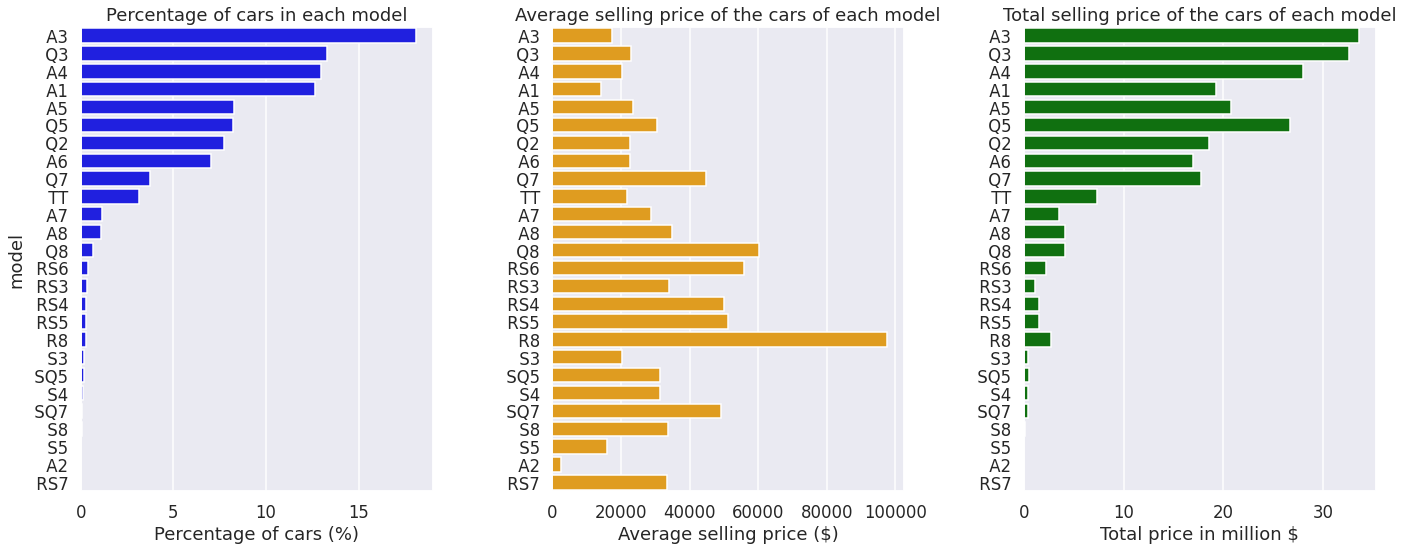

In [24]:
plt.figure(figsize=(20,8))

plt.subplot(1, 3, 1)
sns.barplot(x='percent_of_cars', y=df_agg.index, data=df_agg, orient='h', color='blue')
plt.title("Percentage of cars in each model")
plt.xlabel("Percentage of cars (%)")
# plt.grid()

plt.subplot(1, 3, 2)
sns.barplot(x='mean', y=df_agg.index, data=df_agg, orient='h', color='orange')
plt.title("Average selling price of the cars of each model")
plt.xlabel("Average selling price ($)")
plt.ylabel("")

plt.subplot(1, 3, 3)
sns.barplot(x='sum', y=df_agg.index, data=df_agg, orient='h', color='green')
plt.title("Total selling price of the cars of each model")
plt.xlabel("Total price in million $")
plt.ylabel("")

#plt.suptitle("Barplot of the Audi used car")
plt.tight_layout()
plt.show()

# **Observation:**
From the above barplots:
*   Top 5 selling car models are A3, Q3, A4, A1 and A5
*   Top 5 average selling price of car models are R8, Q8, RS6, RS5 and RS4
*   Top 5 total selling price of car models are A3, Q3, A4, A1 and A5






# EDA With group by for Transmission

In [25]:
df_agg = df.groupby('transmission')['price'].agg(['count', 'mean', 'sum'])

display(df_agg)

,count,mean,sum
transmission,,,
Automatic,2708,28204.750000,76378463
Manual,4369,16101.033417,70345415
Semi-Auto,3591,27161.781676,97537958


In [26]:
# sorting the dataframe of the column name 'count'
df_agg = df_agg.sort_values(by='count', ascending=False)

# createing a new column percentage of the cars in each model
df_agg['percent_of_cars'] = (df_agg['count']/df_agg['count'].sum())*100

# converted the 'sum' column into millions
df_agg['sum'] = df_agg['sum']/1000000

# keep up to two decimal points
df_agg = df_agg.round(2)

# removing the 'count' column
df_agg = df_agg.drop('count', axis=1)

display(df_agg.head())

,mean,sum,percent_of_cars
transmission,,,
Manual,16101.03,70.35,40.95
Semi-Auto,27161.78,97.54,33.66
Automatic,28204.75,76.38,25.38


# Barplot: The Audi Cars For Transmission
Percentage of cars, Average and Total selling price of cars for Transmission

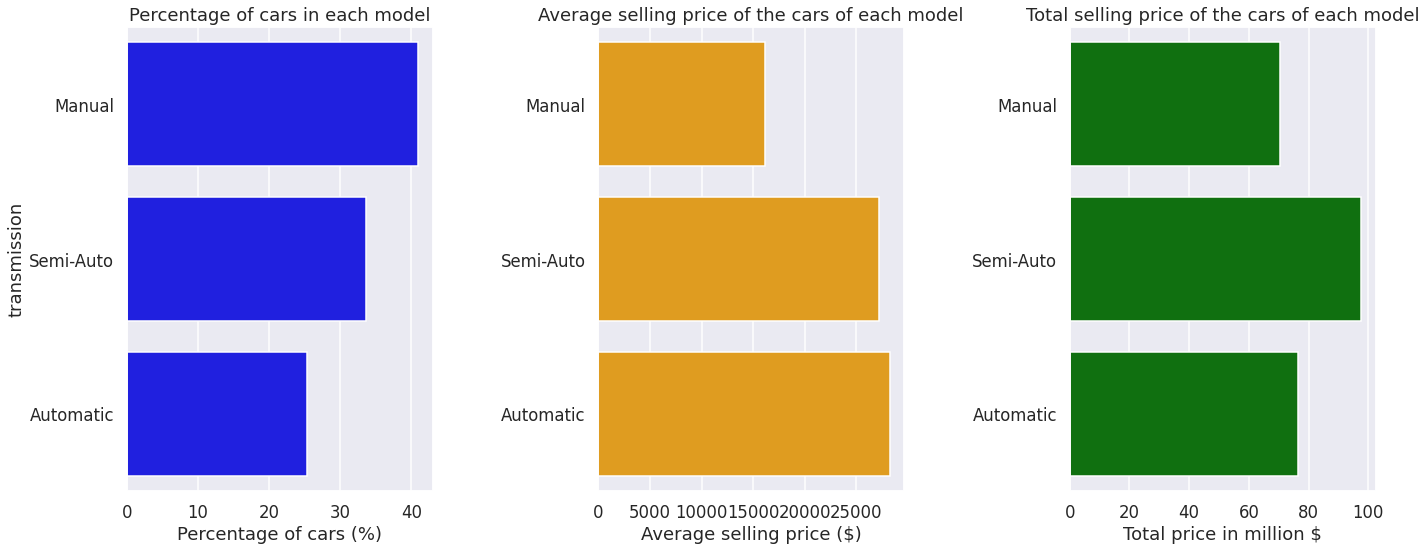

In [27]:
plt.figure(figsize=(20,8))

plt.subplot(1, 3, 1)
sns.barplot(x='percent_of_cars', y=df_agg.index, data=df_agg, orient='h', color='blue')
plt.title("Percentage of cars in each model")
plt.xlabel("Percentage of cars (%)")
# plt.grid()

plt.subplot(1, 3, 2)
sns.barplot(x='mean', y=df_agg.index, data=df_agg, orient='h', color='orange')
plt.title("Average selling price of the cars of each model")
plt.xlabel("Average selling price ($)")
plt.ylabel("")

plt.subplot(1, 3, 3)
sns.barplot(x='sum', y=df_agg.index, data=df_agg, orient='h', color='green')
plt.title("Total selling price of the cars of each model")
plt.xlabel("Total price in million $")
plt.ylabel("")

#plt.suptitle("Barplot of the Audi used car")
plt.tight_layout()
plt.show()

# **Observations:**

*   Here three different types of transmission type are present at the dataset: i.e. Manual, Semi-auto and Automatic 
*   From the above barplots, I can say the top selling cars(by Transmission type) is Manual.

*   From the barplot (second one) the average selling price of a car by transmission type, automatic cars have the largest selling price.
*   Top total selling price of car by transmossion type is Semi-Auto according to the above barplot (third one).





# EDA With group by for FuelType

In [28]:
df_agg = df.groupby('fuelType')['price'].agg(['count', 'mean', 'sum'])

display(df_agg)

,count,mean,sum
fuelType,,,
Diesel,5577,23237.516227,129595628
Hybrid,28,30191.750000,845369
Petrol,5063,22480.908355,113820839


In [29]:
# sorting the dataframe of the column name 'count'
df_agg = df_agg.sort_values(by='count', ascending=False)

# createing a new column percentage of the cars in each model
df_agg['percent_of_cars'] = (df_agg['count']/df_agg['count'].sum())*100

# converted the 'sum' column into millions
df_agg['sum'] = df_agg['sum']/1000000

# keep up to two decimal points
df_agg = df_agg.round(2)

# removing the 'count' column
df_agg = df_agg.drop('count', axis=1)

display(df_agg.head())

,mean,sum,percent_of_cars
fuelType,,,
Diesel,23237.52,129.60,52.28
Petrol,22480.91,113.82,47.46
Hybrid,30191.75,0.85,0.26


# **Barplot: The Audi Cars For FuelType**


Percentage of cars, Average and Total selling price of cars for FuelTyppe

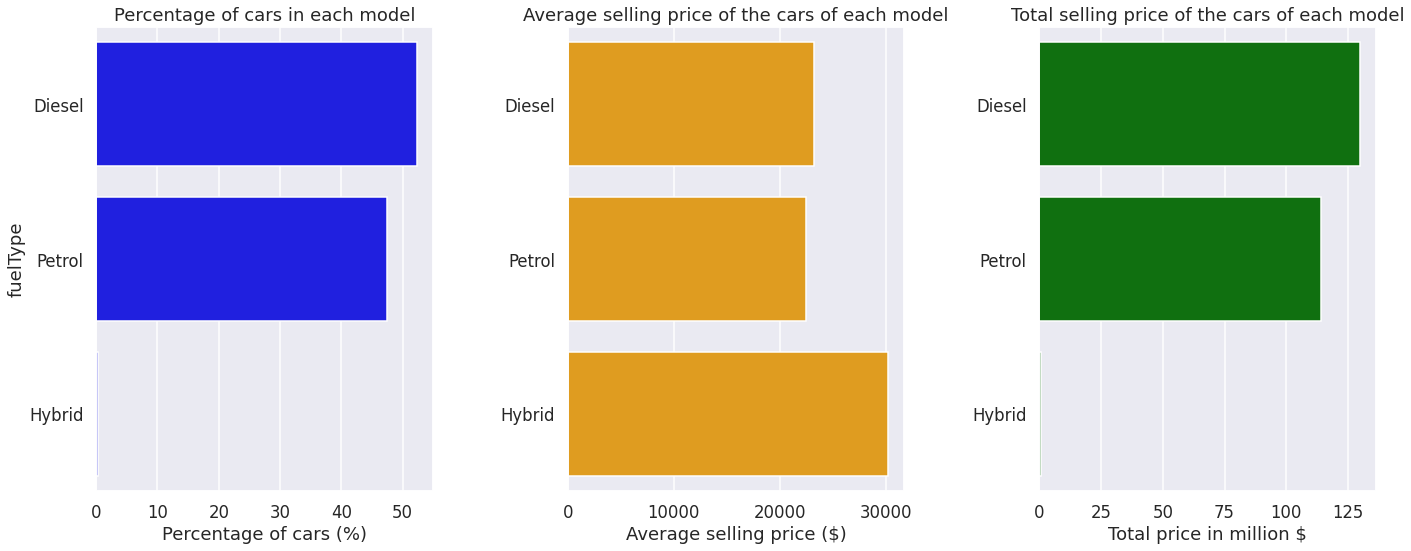

In [30]:
plt.figure(figsize=(20,8))

plt.subplot(1, 3, 1)
sns.barplot(x='percent_of_cars', y=df_agg.index, data=df_agg, orient='h', color='blue')
plt.title("Percentage of cars in each model")
plt.xlabel("Percentage of cars (%)")
# plt.grid()

plt.subplot(1, 3, 2)
sns.barplot(x='mean', y=df_agg.index, data=df_agg, orient='h', color='orange')
plt.title("Average selling price of the cars of each model")
plt.xlabel("Average selling price ($)")
plt.ylabel("")

plt.subplot(1, 3, 3)
sns.barplot(x='sum', y=df_agg.index, data=df_agg, orient='h', color='green')
plt.title("Total selling price of the cars of each model")
plt.xlabel("Total price in million $")
plt.ylabel("")

#plt.suptitle("Barplot of the Audi used car")
plt.tight_layout()
plt.show()

# **Observations:**

*   There are most of the selling cars (about 54%) are Diesel drive cars(FuelType is Diesel).    
*   Average price of a Hybrid car is greater than Diesel/ petrol cars.
*   Top total selling price of cars by fuelType:i.e. Diesel cars.(about $133M) 





